# TDA

Important concepts:
* topology
* persistent homology
* simplicial complex -> used in UMAP

TDA: *we are looking for N-dimensional holes!*

* Scikit TDA : https://www.youtube.com/watch?v=AWoeBzJd7uQ
* TDA: https://www.youtube.com/watch?v=8nUBqawu41k
* TDA and computer vision: https://www.youtube.com/watch?v=1EEVx4aVeU0
* Persistent homology: https://www.youtube.com/watch?v=UxEH7WySO60
* ML and topology: https://www.youtube.com/watch?v=FH-RZiOq4h0

[**Introduction to topological data analysis**](https://arxiv.org/pdf/1710.04019.pdf)

[Another introductory text for the practitioner](https://s3.amazonaws.com/cdn.ayasdi.com/wp-content/uploads/2018/04/16103748/chp3A10.10072F978-3-319-75028-6_4.pdf)


## Topology

* topology or "shape" as an organising principle for data.
* topology is about continuity of deformations (no tearing/glueing)

Topologies are described by topological invariants: metrics that do not change under continuous change (
so no tearing/glueing) of the structure. 

**Why** use topology at all: *topology allows the representation of extremely complex shapes in a very compact description.* 

I.e. it may be useful for 
* dimension reduction, 
* feature extraction and 
* clustering

### Example: Seven Bridges of Königsberg

![Bridges](_images/euler_4.png "bla")

Relevant why?: *first hint to the study of (network) topology, where exact sizes, shapes and positions of connection points are deemed irrelevant*

### Example: coffee cup - donut

![Coffee cup](_images/coffee_donut.png "bla")

### Example: Gene mapping

![Ayasdi](_images/gene_mapping.png "genes")

## Homology



Persistent homology: the diagrams show how persistent the invariants are under different scalings. With different scaling you have to think of the dendrogram from hierarchical clustering, the scaling is the cut-off distance between clusters. With the change in scaling you obtain an evolution of the homology which can be represented in a bar code. Analogy: see scaling as the amount of blurring applied to an image. 

* **Betti numbers**
* persistence diagram
* persistence barcode

First three Betti numbers:
* $\mathbf{b_0} = \#connectedcomponents$
* $\mathbf{b_1} = \#edges - \#vertices + \#connectedcomponents$; number of 1D-loops/cycles.
* $\mathbf{b_2}$: number of 2D-voids

I.e. it is about multidimensional holes but in TDA it seems to be focus on the lower-dimensional, more interpretable Betti numbers.

![Betti](_images/betti_1.png "betti")

![betti 2](_images/betti_2.png)

**Filtration**:

By varying a connection-radius around each point we obtain different graphs that have different topologies.
In TDA this radius is referred to as the scale. 

For increasing radius topologies are *born* and topologies *die*.

![filtration](_images/filtration.png)

![filtration](_images/filtration_2.jpg)

### Persistence barcode \& persistence diagram.

The persistence diagram plots the relationship between the birth and death of topologies, described by the first Betti-numbers.

Noisy features appear near the diagonal; they have short *lifespan* which refers to the difference between the *birth* and *death* of a feature under an increasing scale.



![persistence](_images/persistence_diagram.png)

## Simplicial complex

terms: Cech complex, Rips complex, nerve theorem

The scaling mentioned earlier: think of the expanding radii around each point as an increasing scale.

![simplicial](_images/simplicial_1.png)

![simplicial](_images/simplicial_2.png)

# Libraries

* UMAP
* Scikit TDA: ripser, kmapper, persim, cechmate, tadasets

## Applies to us?

* non-dimensionalising time-dependent data
* identification of clusters in noisy data
* feature expansion

# Example: topology-assisted visualisation of genomic data

https://github.com/scikit-tda/kepler-mapper/tree/master/examples

In [75]:
import sktda
import numpy as np
import scipy as sc
import pandas as pd
import os
import seaborn as sns
import kmapper as km

from umap import UMAP
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import sklearn
from sklearn import ensemble
from sklearn import preprocessing

In [172]:
# load in data
os.chdir('/media/bramiozo/DATA-FAST/genetic_expression/hackathon_2/Lung/')
data = pd.read_csv("rna_ex_meta_reduced.csv", sep=";")

In [173]:
# some density plots
meta_cols = ['Smoking Status', 'Response',
             'Sample Type', 'Overall Survival Status', 'Pack Years', 'Diagnosis',
             'Drug Therapy Type', 'New Tumor Event', 'Stage', 'Radiation Therapy',
             'Time To Overall Survival (Days)', 'Reponse To Therapy',
             'Age At Diagnosis (Years)', 'Gender', 'Smoking', 'y']
gen_cols = [_col for _col in data.columns if (_col not in meta_cols) & (_col != 'Unnamed: 0')]

In [184]:
target = 'Response'
data.dropna(subset=[target], axis=0, inplace=True)
data['y'] = data[target].astype(int)

In [175]:
data.set_index('Unnamed: 0', inplace=True)

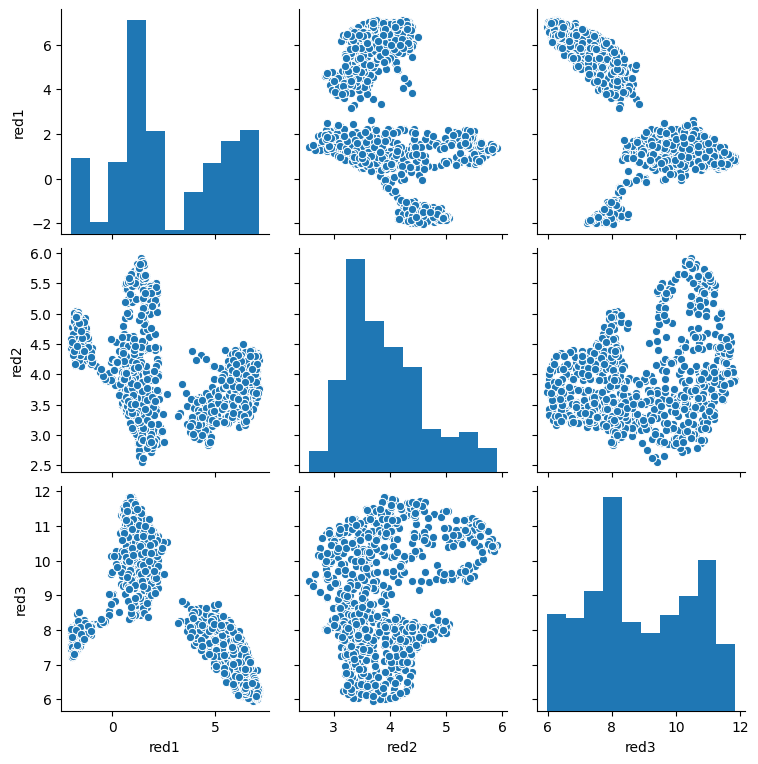

In [185]:
# UMAP
umap_red = UMAP(n_components=3, random_state=323, n_neighbors=30)
umap_red.fit(data[gen_cols])
reduced_umap = umap_red.transform(data[gen_cols])
sns.pairplot(data=pd.DataFrame(data=reduced_umap, columns=['red1', 'red2', 'red3']), vars=['red1', 'red2', 'red3'])

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: UMAP()
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (867, 820)

..Projecting data using: 
	UMAP(verbose=3)

UMAP(verbose=3)
Construct fuzzy simplicial set
Fri Jun 12 16:47:57 2020 Finding Nearest Neighbors
Fri Jun 12 16:47:57 2020 Finished Nearest Neighbor Search
Fri Jun 12 16:47:57 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Jun 12 16:48:01 2020 Finished embedding

..Scaling with: MinMaxScaler()

Mapping on data shaped (867, 820) using lens shaped (867, 3)

Minimal points in hypercube before clustering: 10
Creating 3375 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 

   > Found 1 clusters.

   > Found 1 clusters.

Cube_379 is empty.

Cube_380 is empty.

Cube_381 is empty.

Cube_382 is empty.

Cube_383 is empty.

Cube_384 is empty.

   > Found 1 clusters.

   > Found 1 clusters.

Cube_387 is empty.

Cube_388 is empty.

Cube_389 is empty.

Cube_390 is empty.

Cube_391 is empty.

Cube_392 is empty.

Cube_393 is empty.

Cube_394 is empty.

   > Found 1 clusters.

   > Found 1 clusters.

Cube_397 is empty.

   > Found 1 clusters.

   > Found 1 clusters.

Cube_400 is empty.

Cube_401 is empty.

Cube_402 is empty.

Cube_403 is empty.

Cube_404 is empty.

Cube_405 is empty.

Cube_406 is empty.

Cube_407 is empty.

   > Found 1 clusters.

Cube_409 is empty.

Cube_410 is empty.

Cube_411 is empty.

Cube_412 is empty.

Cube_413 is empty.

Cube_414 is empty.

   > Found 1 clusters.

Cube_416 is empty.

Cube_417 is empty.

Cube_418 is empty.

Cube_419 is empty.

   > Found 1 clusters.

Cube_421 is empty.

Cube_422 is empty.

Cube_423 is empty.

Cube_424 is empt

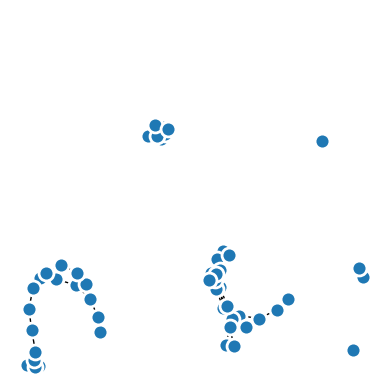

In [203]:
# Mapper 
projector = UMAP() # sklearn.manifold.TSNE(), UMAP()

mapper = km.KeplerMapper(verbose=3)
iso_model = ensemble.IsolationForest(random_state=1729)
iso_model.fit(data[gen_cols])
lens1 = iso_model.decision_function(data[gen_cols]).reshape((data[gen_cols].shape[0], 1))
lens2 = mapper.fit_transform(data[gen_cols], projection=projector)

# Combine both lenses to create a 2-D [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Create the simplicial complex
graph = mapper.map(lens,
                   data[gen_cols],
                   cover=km.Cover(n_cubes=15, 
                                  perc_overlap=0.25),
                   clusterer=sklearn.cluster.OPTICS(min_samples=10, min_cluster_size=10)) # KMeans(n_clusters=3,random_state=1618033)

# Visualization
mapper.visualize(graph,
                 path_html="output/lung_cancer.html",
                 title="Genetic data for lung cancer",
                 custom_tooltips=data['y'].values)


km.draw_matplotlib(graph)
plt.show()

Text(0.5, 1.0, 'Lens')

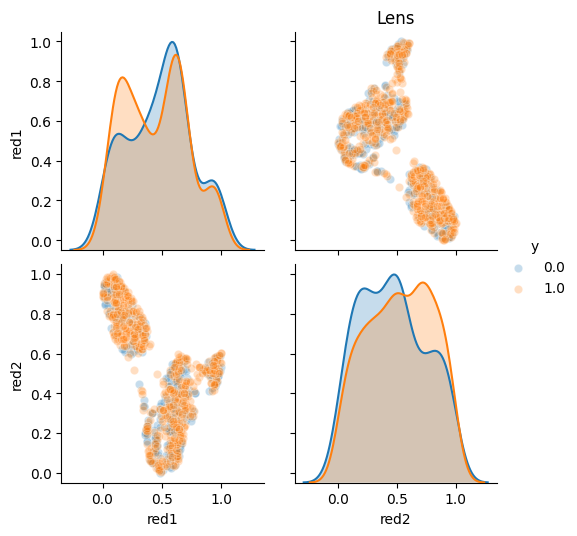

In [206]:
# Lens , mapper
plot_data = np.hstack([lens2, np.reshape(data.y.values, [-1,1])])
sns.pairplot(data=pd.DataFrame(data=plot_data, 
                               columns=['red1', 'red2', 'y']), 
             vars=['red1', 'red2'], plot_kws={'alpha': 0.25},
            hue='y')
plt.title("Lens")

In [67]:
import persim as pr
import ripser as rip

In [68]:
rips = rip.Rips()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [187]:
# add noise
new_data = data[gen_cols].values # preprocessing.StandardScaler().fit_transform(X=data[gen_cols]) # quantile_transform(X=data[gen_cols], output_distribution='normal')
noise_var = 0.5
for _col in range(0, new_data.shape[1]):
    v = new_data[:, _col] 
    noise_ = noise_var * np.var(v)
    new_data[:, _col] = v + np.random.normal(loc=0, scale=noise_, size=new_data.shape[0])

Text(0.5, 1.0, 'Original')

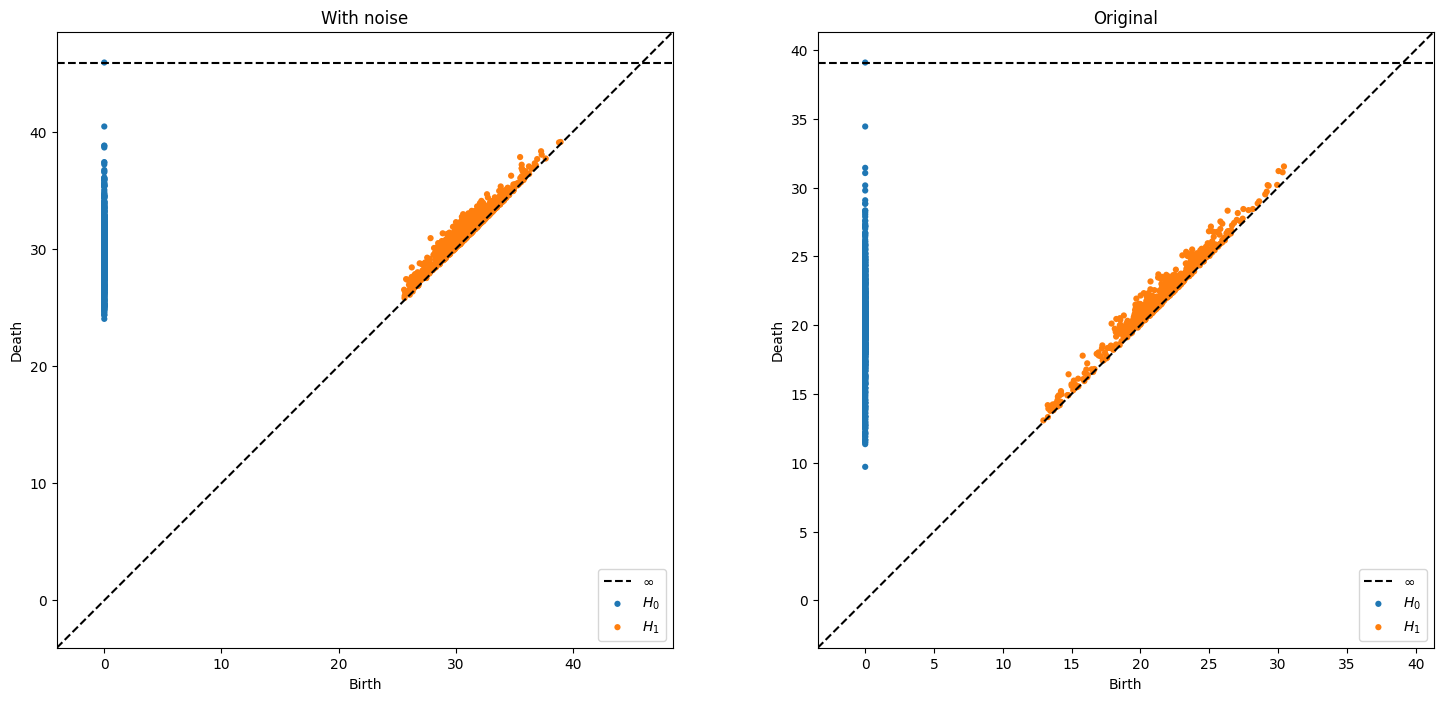

In [188]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
diagrams_new = rips.fit_transform(new_data)
rips.plot(diagrams_new, ax=ax[0])
ax[0].set_title("With noise")

diagrams_original = rips.fit_transform(data[gen_cols])
rips.plot(diagrams_original, ax=ax[1])
ax[1].set_title("Original")

Text(0.5, 0.98, 'UMAP reduction')

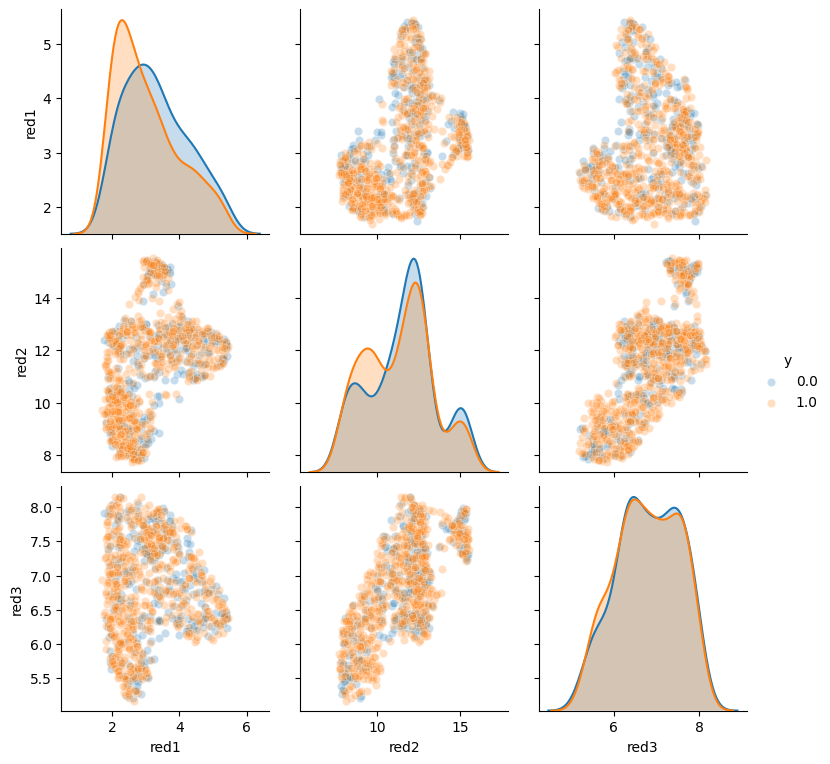

In [189]:
# UMAP
umap_red = UMAP(n_components=3, random_state=323, n_neighbors=50)
umap_red.fit(new_data)
reduced_umap = umap_red.transform(new_data)
plot_data = np.hstack([reduced_umap, np.reshape(data.y.values, [-1,1])])
sns.pairplot(data=pd.DataFrame(data=plot_data, 
                               columns=['red1', 'red2', 'red3', 'y']), 
             vars=['red1', 'red2', 'red3'], plot_kws={'alpha': 0.25},
            hue='y')
plt.title("UMAP reduction")